# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**The goal is to analyze a dataset containing information on used cars to identify the key factors influencing their prices. This data task involves exploring and understanding the dataset to uncover patterns and correlations that contribute to variations in car prices. The outcome should be actionable insights and recommendations for a used car dealership, helping them understand what features consumers value in a used car.**

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Begin by taking a look at the initial rows of your dataset using `df.head()` to gain a quick understanding of how the data is structured.

2. Utilize `df.describe()` to examine summary statistics, including mean, median, and quartiles, for numerical columns, providing insight into the basic statistical properties of your data.

3. Employ `df.info()` to review the data types of each column and pinpoint any missing values that may exist within the dataset.

4. Investigate columns with missing values to assess the extent of the missing data and decide on appropriate strategies for handling it, such as imputation or removal.

5. Examine the unique values in categorical columns using `df['column_name'].unique()` to confirm the existence of meaningful and diverse categories.

6. Scrutinize categorical columns for anomalies or unexpected values that could impact the accuracy of your analysis.

7. Visualize the distribution of numerical features through histograms or box plots to gain insights into the central tendencies and spread of the data.

8. Explore the distribution of categorical variables using bar charts to observe the frequency and variation in different categories.

9. Calculate the correlation matrix with `df.corr()` to understand the relationships between numerical features and the target variable (e.g., price).

10. Visualize correlations using a heatmap to identify potential multicollinearity or strong correlations between features.

11. Detect and analyze potential outliers in numerical columns using box plots or scatter plots.

12. Evaluate whether outliers are valid data points or if they need addressing, considering their impact on the overall analysis.

13. Investigate unique values and patterns in categorical features to comprehend their significance in relation to used car prices.

14. Consider creating visualizations, such as bar charts or count plots, to observe the distribution of cars across different categories, providing a comprehensive view of the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/vehicles.csv')

In [3]:
# Display basic information about the dataset
# print(df.info())

# Summary statistics for numerical features
# print(df.describe())

# Explore missing values
# print(df.isnull().any())

In [4]:
# Explore categorical features
for column in df.columns:
    print(f'COLUMN: {column}\n')
#     print(df[column].value_counts())
    print(f'FEATURES:\n{df[column].unique()}\n','---'*20)

COLUMN: id

FEATURES:
[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]
 ------------------------------------------------------------
COLUMN: region

FEATURES:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san lu

FEATURES:
[nan '3GTP1VEC4EG551563' '1GCSCSE06AZ123805' ... '2HGES15535H620534'
 '1FDWF37P64EA24868' 'SAJGX2749VCOO8376']
 ------------------------------------------------------------
COLUMN: drive

FEATURES:
[nan 'rwd' '4wd' 'fwd']
 ------------------------------------------------------------
COLUMN: size

FEATURES:
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
 ------------------------------------------------------------
COLUMN: type

FEATURES:
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
 ------------------------------------------------------------
COLUMN: paint_color

FEATURES:
[nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']
 ------------------------------------------------------------
COLUMN: state

FEATURES:
['az' 'ar' 'fl' 'ma' 'nc' 'ny' 'or' 'pa' 'tx' 'wa' 'wi' 'al' 'ak' 'ca'
 'co' 'ct' 'dc' 'de' 'ga' 'hi' 'id' 'il' 'in' 'ia' 'ks' 'ky' 'la' '

**<u>VISUALIZE DATA DISTRIBUTIONS AND RELATIONSHIPS</u>**
- sampling the data to get values to plot
---

In [5]:
sampled_df = df.sample(n=1000, random_state=42)

**PLOTTING TYPES** ~ ***In Order***
- histogram
- heatmap
- barplot
- lineplot
- scatterplot
- pearplot
- boxplot
- violinplot
- crosstab

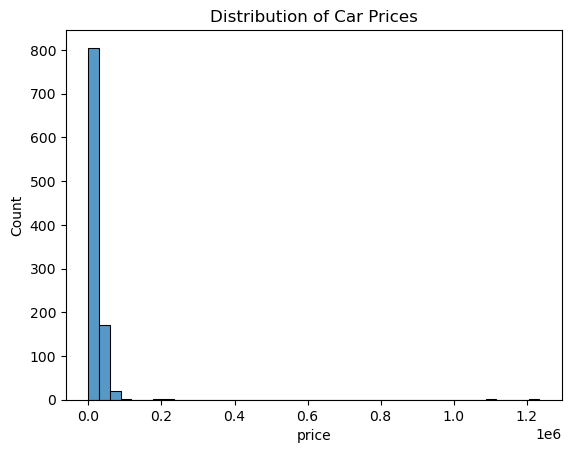

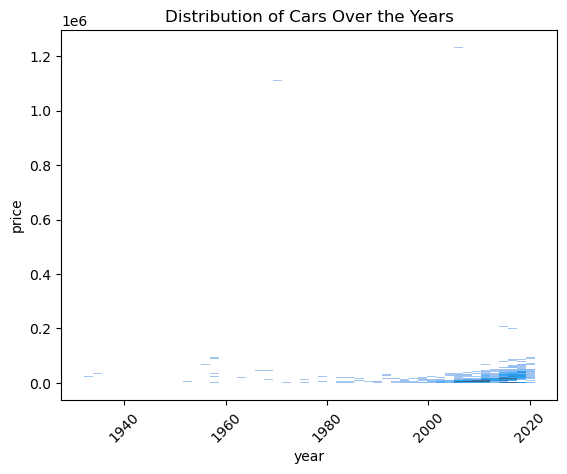

In [6]:
# HISTOGRAM

sns.histplot(sampled_df['price'], bins=30)
plt.title('Distribution of Car Prices')
plt.show()

sns.histplot(data=sampled_df, x='year', y='price')
plt.title('Distribution of Cars Over the Years')
plt.xticks(rotation=45)
plt.show()

C:\Users\CAG\AppData\Local\Temp\ipykernel_22600\3904978114.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_df.corr()


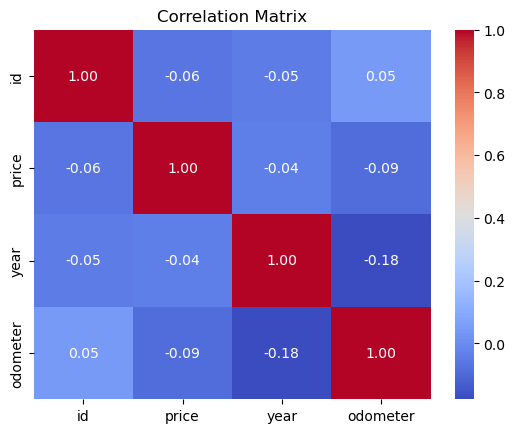

In [7]:
# HEATMAP

correlation_matrix = sampled_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

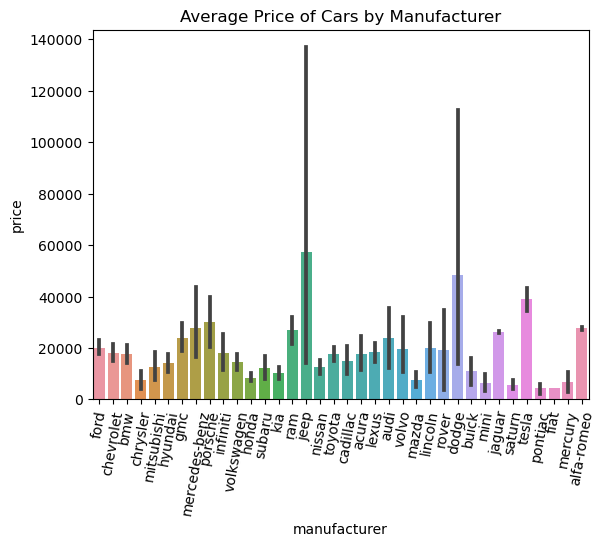

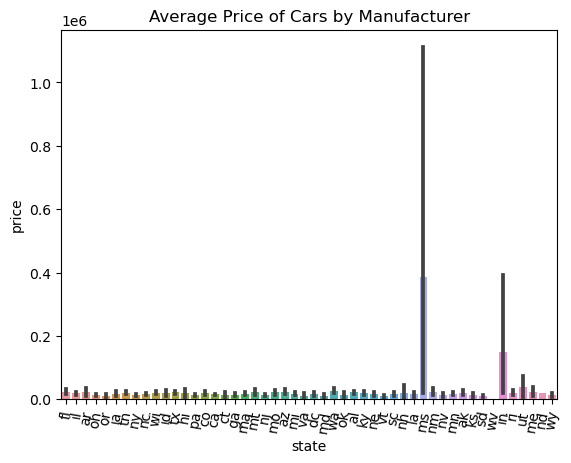

In [42]:
# BARPLOT

sns.barplot(data=sampled_df, x='manufacturer', y='price')
plt.xticks(rotation=80)
plt.title('Average Price of Cars by Manufacturer')
plt.show()

sns.barplot(data=sampled_df, x='state', y='price')
plt.xticks(rotation=80)
plt.title('Average Price of Cars by Manufacturer')
plt.show()

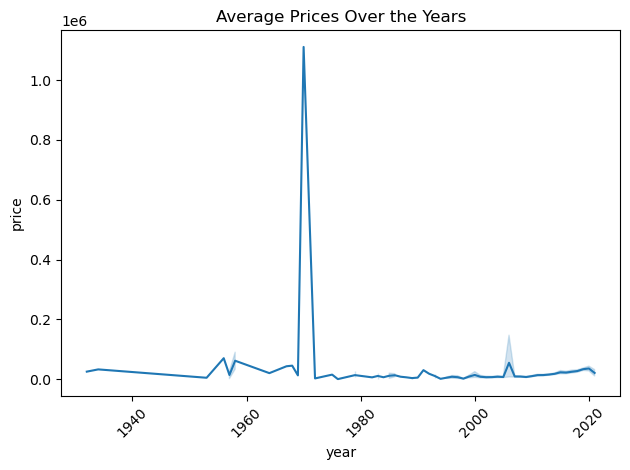

In [9]:
# LINEPLOT

sns.lineplot(data=sampled_df, x='year', y='price')
plt.title('Average Prices Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

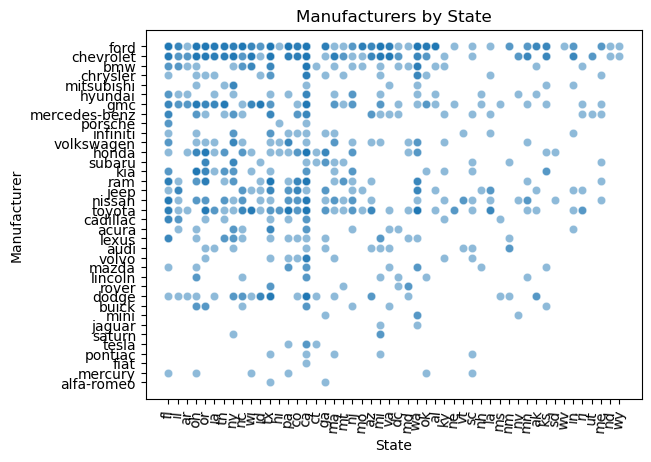

In [45]:
# SCATTERPLOT

sns.scatterplot(data=sampled_df, x='state', y='manufacturer', alpha=0.5)
plt.title('Manufacturers by State')
plt.xlabel('State')
plt.ylabel('Manufacturer')
plt.xticks(rotation=85)
plt.show()

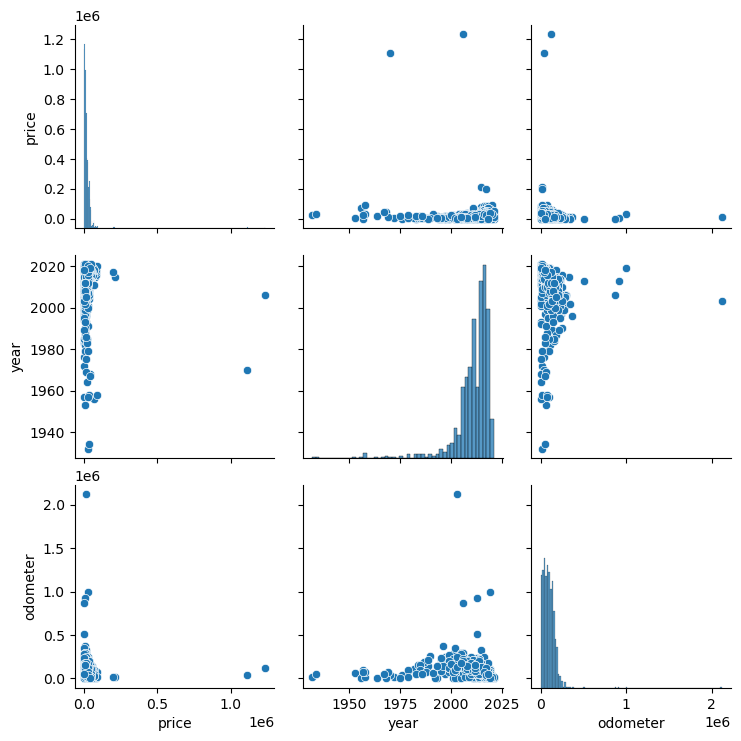

In [11]:
# PAIRPLOT

sns.pairplot(sampled_df[['price', 'year', 'odometer']])
plt.show()

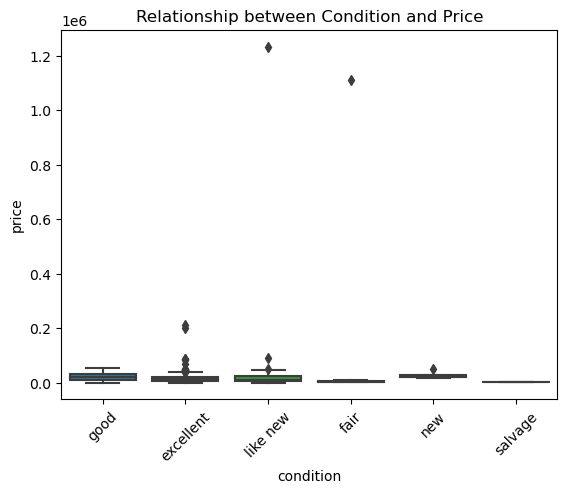

In [41]:
# BOXPLOT

sns.boxplot(data=sampled_df, x='condition', y='price')
plt.title(f'Relationship between Condition and Price')
plt.xticks(rotation=45)
plt.show()

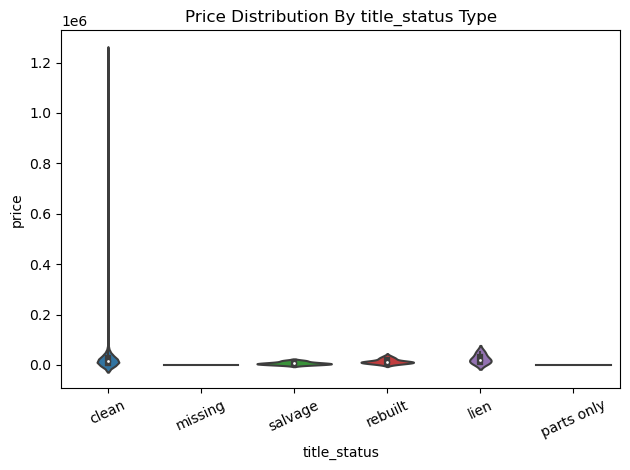

In [49]:
# VIOLINPLOT

sns.violinplot(data=sampled_df, x='title_status', y='price')
plt.title(f'Price Distribution By title_status Type')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

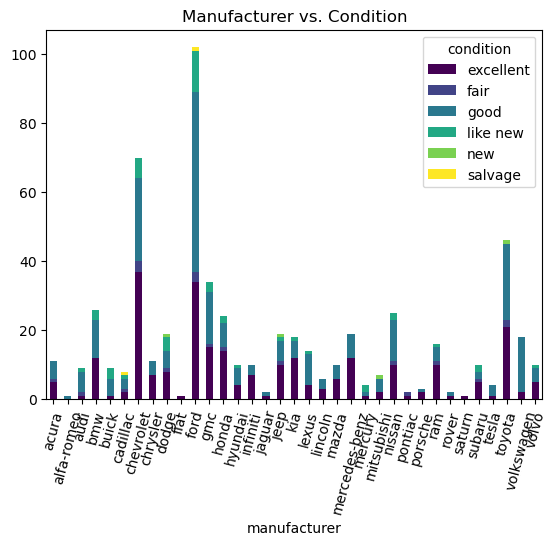

In [39]:
# CROSSTAB

pd.crosstab(sampled_df['manufacturer'], sampled_df['condition']).plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Manufacturer vs. Condition')
plt.xticks(rotation=75)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [15]:
# Convert 'year' to integer, handling errors by coercing
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int32')
df.sample()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
248093,7314334541,las vegas,26997,2017,bmw,3 series,NaN,4 cylinders,gas,32374.0,clean,automatic,NaN,rwd,compact,sedan,blue,nv


1. **<u>Handling Missing Values:</u>**

In [16]:
print(df.columns)

# DROP UNNECESSARY COLUMNS (id, VIN)

# Drop rows with missing values in 'price' as it is the target variable

if ('id' in df.columns) | ('VIN' in df.columns):
    df = df.drop(columns=['id', 'VIN'])

# Drop rows with missing 'price'
df = df.dropna(subset=['price'])  


# Handling missing values
for column in df.columns:
    if df.dtypes[column] == object:  # Check the data type of the column
        df[column].fillna(df[column].mode()[0], inplace=True)  # Impute with the most frequent value for categorical columns
    else:
        df[column].fillna(df[column].median(), inplace=True)  # Impute with the median for numerical columns

# CHECK AFTER
print(df.columns)
# Verify that there are no more missing values
# print(df.isnull().any())


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
region          False
price           False
year            False
manufacturer    False
model           False
condition       False
cylinders       False
fuel            False
odometer        False
title_status    False
transmission    False
drive           False
size            False
type            False
paint_color     False
state           False
dtype: bool


2. **<u>Feature Engineering:</u>**

In [17]:
# Create a new feature 'age' based on the 'year' of the car
df['age'] = 2023 - df['year']

# Convert odometer from miles to kilometers
df['odometer_km'] = df['odometer'] * 1.60934

3. **<u>Handling Categorical Variables:</u>**

In [18]:
numerical_features = []
categorical_features = []
print(df.info())

for column in df.columns:
    if df.dtypes[column] in ['int64', 'Int64', 'int32', 'Int32', 'float64']:  # Check if the data type is numerical
        numerical_features.append(column)
    elif df.dtypes[column] == 'object':  # Check if the data type is categorical
        categorical_features.append(column)

# Print the lists
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          426880 non-null  Int32  
 3   manufacturer  426880 non-null  object 
 4   model         426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  size          426880 non-null  object 
 13  type          426880 non-null  object 
 14  paint_color   426880 non-null  object 
 15  state         426880 non-null  object 
 16  age           426880 non-null  Int32  
 17  odometer_km   426880 non-null  float64
dtypes: I

In [25]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [27]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Apply PCA to reduce dimensionality
pca = PCA()  # Adjust the number of components based on your needs
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Apply the same transformation to the test set

MemoryError: Unable to allocate 76.8 GiB for an array with shape (30193, 341504) and data type float64

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [24]:
# Model 1: Linear Regression with PCA
linear_reg_pca = LinearRegression()
linear_scores_pca = cross_val_score(linear_reg_pca, X_train_pca, y_train, scoring='neg_mean_squared_error', cv=5)
linear_rmse_pca = np.sqrt(-linear_scores_pca.mean())
print("Linear Regression with PCA RMSE:", linear_rmse_pca)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 838, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 61.5 GiB for an array with shape (30193, 273203) and data type float64

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 838, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 526, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 299, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 230, in astype_array
    values = astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\CAG\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py", line 170, in astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 61.5 GiB for an array with shape (30193, 273204) and data type float64


In [ ]:
# Model 2: Lasso Regression with PCA
lasso_reg_pca = Lasso()
lasso_scores_pca = cross_val_score(lasso_reg_pca, X_train_pca, y_train, scoring='neg_mean_squared_error', cv=5)
lasso_rmse_pca = np.sqrt(-lasso_scores_pca.mean())
print("Lasso Regression with PCA RMSE:", lasso_rmse_pca)

In [ ]:
# Model 3: Ridge Regression
ridge_reg = Ridge()
ridge_scores = cross_val_score(ridge_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
ridge_rmse = np.sqrt(-ridge_scores.mean())
print("Ridge Regression RMSE:", ridge_rmse)


In [ ]:
# Model 4: Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_rmse = np.sqrt(-rf_scores.mean())
print("Random Forest Regression RMSE:", rf_rmse)


In [ ]:
# Model 5: Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()
gb_scores = cross_val_score(gb_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
gb_rmse = np.sqrt(-gb_scores.mean())
print("Gradient Boosting Regression RMSE:", gb_rmse)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluate the models on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test Set RMSE: {rmse}')

# Evaluate Linear Regression model
evaluate_model(linear_reg_model, X_test, y_test)

# Evaluate Random Forest Regressor model
evaluate_model(random_forest_model, X_test, y_test)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.